Notebook that makes plots for the Wilks' theorem sensitivity studies

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math
import matplotlib.colors as colors
import pickle as pkl

Welcome to JupyROOT 6.16/00


In [2]:
# we're going to load in three arrays - one for each parameter
with open("bins_sens.txt","r") as bins:
    lines = bins.readlines()
    lines[0].strip()
    lines[1].strip()
    lines[2].strip()
    vals0 = lines[0].split(" ")
    vals1 = lines[1].split(" ")
    vals2 = lines[2].split(" ")
    m41_list= []
    ue4_list= []
    um4_list= []
    for v in range(len(vals0)-1):
        m41_list.append(float(vals0[v]))
    for v in range(len(vals1)-1):
        ue4_list.append(float(vals1[v]))
    for v in range(len(vals2)-1):
        um4_list.append(float(vals2[v]))
print("m values:", m41_list )
print("ue4 values:",ue4_list)
print("um4 values:",um4_list)

def getbincenters( fulllist):
    newlist =[]
    for i in range(len(fulllist)-1):
        topval = fulllist[i+1]
        botval = fulllist[i]
        center = (topval+botval)/float(2.0)
        newlist.append(center)
    return newlist

m41_center = getbincenters(m41_list)
ue4_center = getbincenters(ue4_list)
um4_center = getbincenters(um4_list)

print(um4_center)

m values: [0.0120226, 0.017378, 0.0251189, 0.0363078, 0.0524807, 0.0758578, 0.109648, 0.158489, 0.229087, 0.331131, 0.47863, 0.691831, 1.0, 1.44544, 2.0893, 3.01995, 4.36516, 6.30957, 9.12011, 13.1826, 19.0546, 27.5423, 39.8107, 57.544, 83.1764, 120.226]
ue4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]
um4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]
[0.010846950000000001, 0.012684299999999999, 0.014832849999999998, 0.01734535, 0.02028345, 0.02371925, 0.02773705, 0.0324354, 0.03792955, 0.04435435, 0.0518675, 0.060653250000000006, 0.0709272,

In [3]:
# chi2 array is more complicated
# each row represents a grid point
# first load as list of lists and make 1D plots

# number of universes used in this simulation
num_uni=1
# initialize arr to fill
chi2_arr=[]
m_arr=[]
e_app_arr=[]
e_dis_arr=[]
mu_dis_arr=[]
with open("chis_sens.txt","r") as chis:
# with open("space.txt","r") as chis:

    lines = chis.readlines()
    for line in lines:
        chi2_arr.append(float(line))

In [4]:
# change chi2 arr to 25x25x25 for 3d plot
chi_arr_sens=np.zeros((25,25,25))
minpt =1000000
for pt in range(len(chi2_arr)):
    if chi2_arr[pt]<minpt: 
        minpt = chi2_arr[pt]
print(minpt)

sumex=0
for i in range(len(chi2_arr)):
    chi2_arr[i]=chi2_arr[i]-minpt
    val = chi2_arr[i]
    if (val > 6.25):
        sumex+=1
        
print(sumex,float(sumex)/float(len(chi2_arr)))

for pt in range(len(chi2_arr)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25)*(25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*(25)*(25))/(25))
    um4_id = pt % (25)
    if(pt==10600):
        print(m_id,ue4_id,um4_id)
        print(m41_list[m_id],ue4_list[ue4_id],um4_list[um4_id])
    chi_arr_sens[ue4_id][m_id][um4_id]=chi2_arr[pt]
    
print(chi_arr_sens[0][0][0])
print(chi_arr_sens[4][4][4])
print(chi_arr_sens[9][9][9])
print(chi_arr_sens[19][19][19])
print(chi_arr_sens[24][24][24])

130.157
1453 0.092992
16 24 0
4.36516 0.427574 0.01
2.0549999999999784
2.0549999999999784
2.0459999999999923
10.573999999999984
223.583


In [5]:
confidence_arr=np.copy(chi_arr_sens)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_sens[i][j][k]
#             print(i,j,k,delta)
            if delta < 6.25:
                confidence_arr[i][j][k] = 0
            else:
                confidence_arr[i][j][k] = 1 

[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


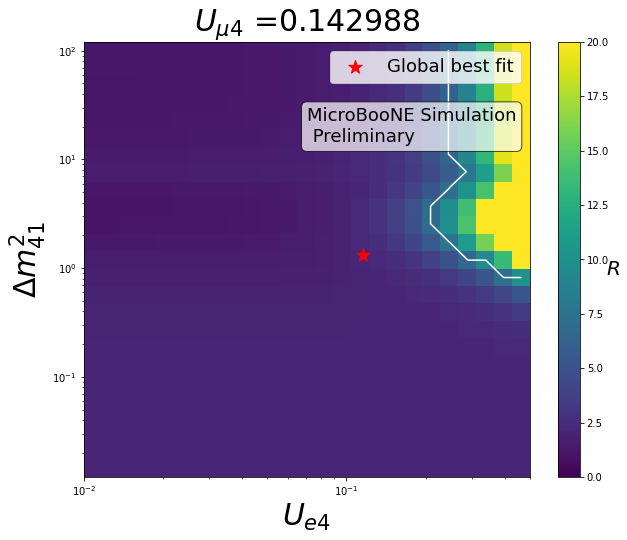

/usr/lib/python3/dist-packages/ipykernel_launcher.py:45: UserWarning: The following kwargs were not used by contour: 'fontsize'


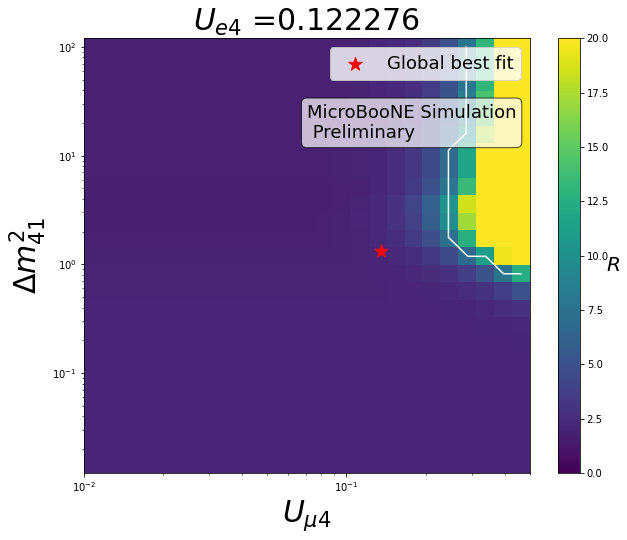

/usr/lib/python3/dist-packages/ipykernel_launcher.py:69: UserWarning: The following kwargs were not used by contour: 'fontsize'


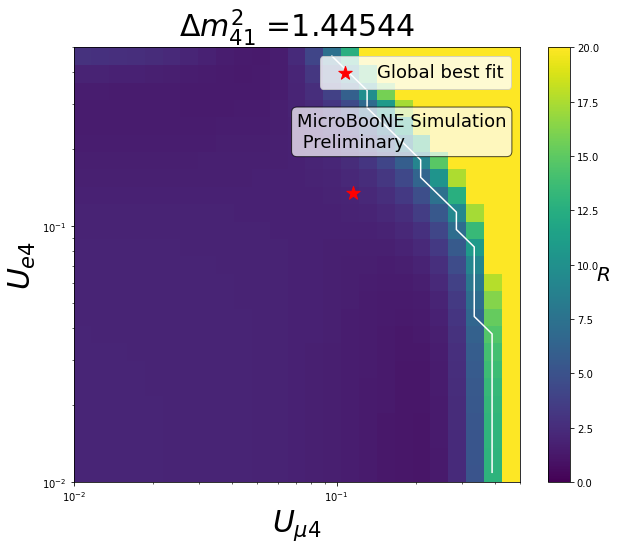

In [8]:
# make projections at global best fit
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

# norm=colors.Normalize(vmin=1e-13, vmax=20)

# picking slices m41,ue,umu4
# global best fit: 13,16,17
# fake data set 1: 8,24,23
# fake data set 2: 15,0,20

# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,:,17],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr[:,:,17],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter([.116],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{\mu4}$ ="+str(um4_list[17]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=18)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.5, 0.85, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
pkl.dump(fig, open('sens_umu4_gbf.p', 'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[16,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr[16,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter([.135],[1.32],marker="*",color ="red",label="Global best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"$U_{e4}$ ="+str(ue4_list[16]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=18)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.5, 0.85, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
pkl.dump(fig, open('sens_ue4_gbf.p', 'wb'))
plt.show()
plt.close()



x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,13,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=20)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr[:,13,:],[.9], colors='white',fontsize=20);
plt.scatter([.116],[.135],marker="*",color ="red",label="Global best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[13]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=18)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.5, 0.85, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
pkl.dump(fig, open('sens_m41_gbf.p', 'wb'))
plt.show()
plt.close()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: UserWarning: No contour levels were found within the data range.
  from ipykernel import kernelapp as app
/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'
  from ipykernel import kernelapp as app


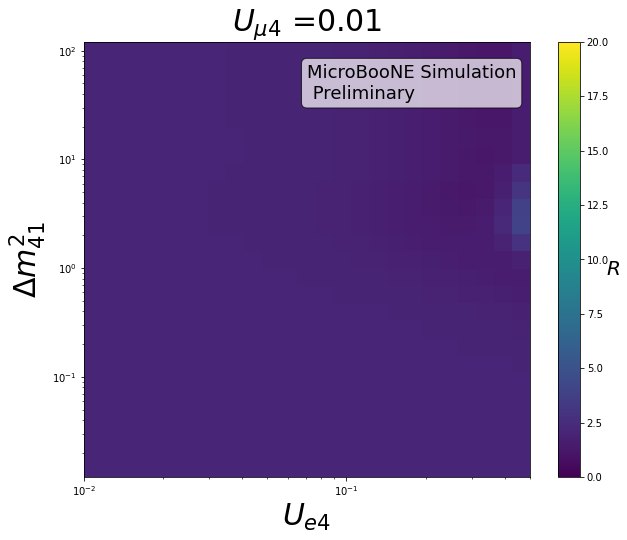

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


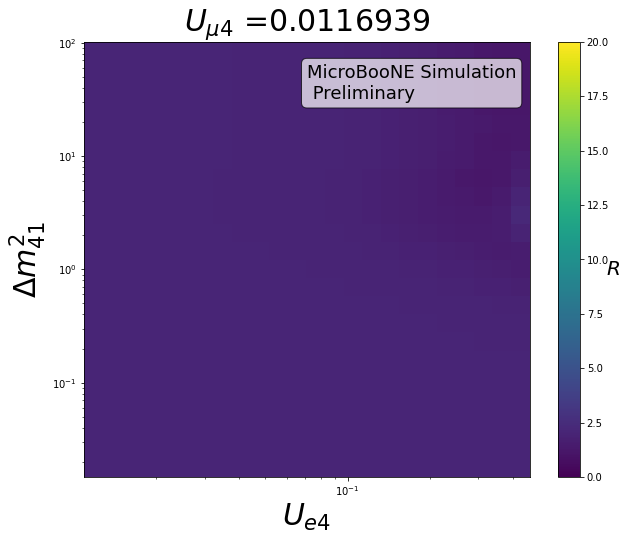

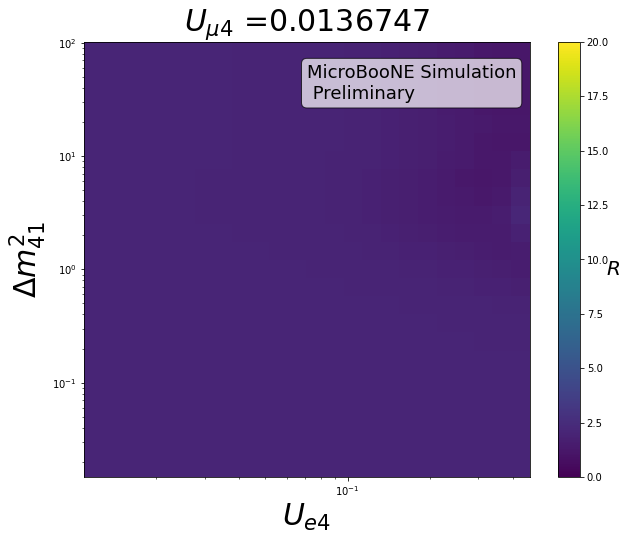

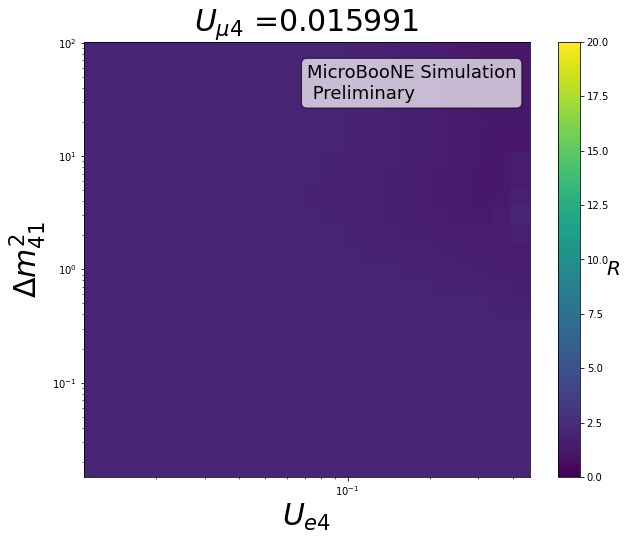

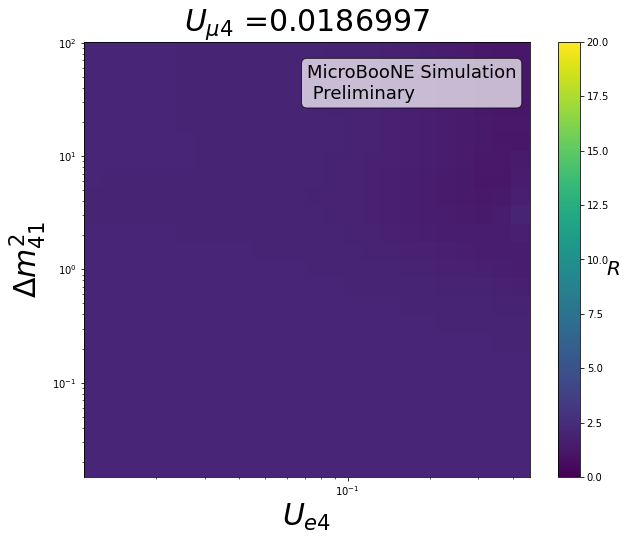

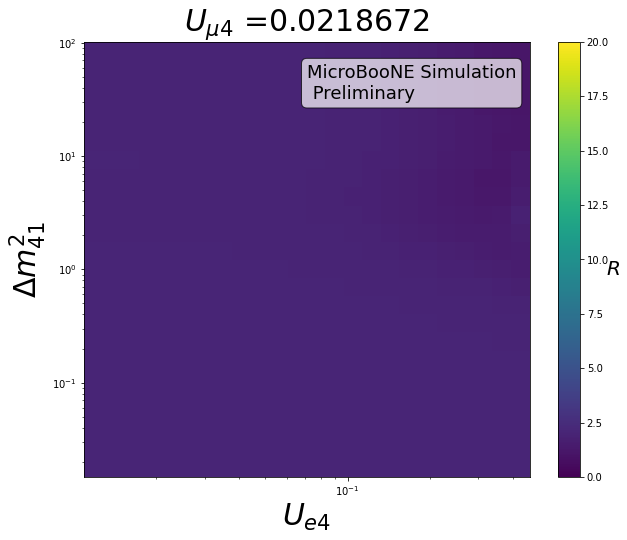

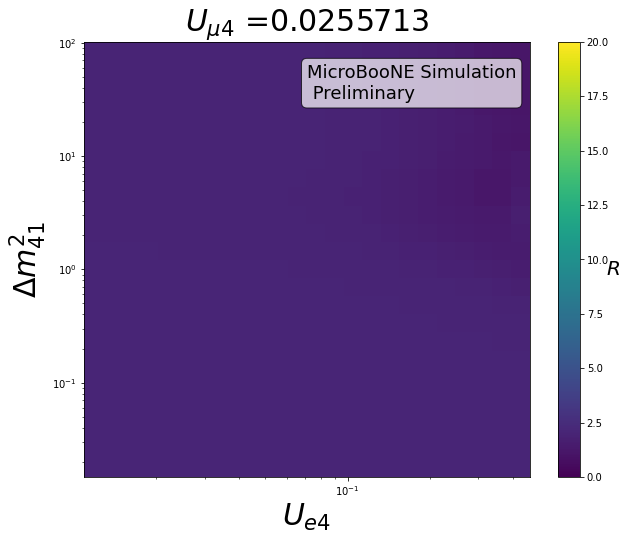

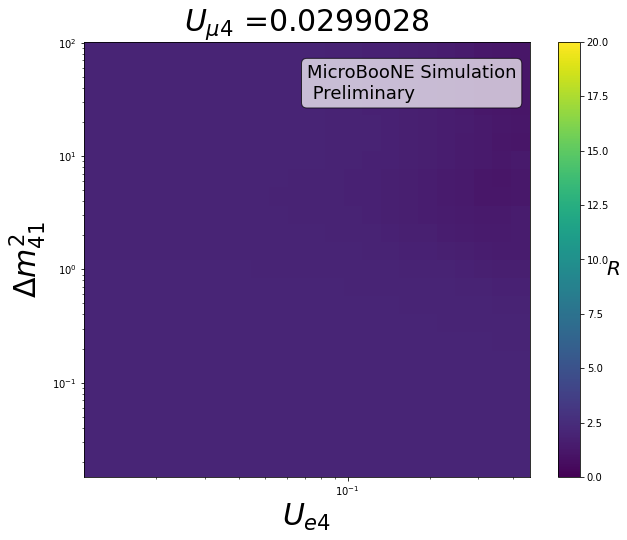

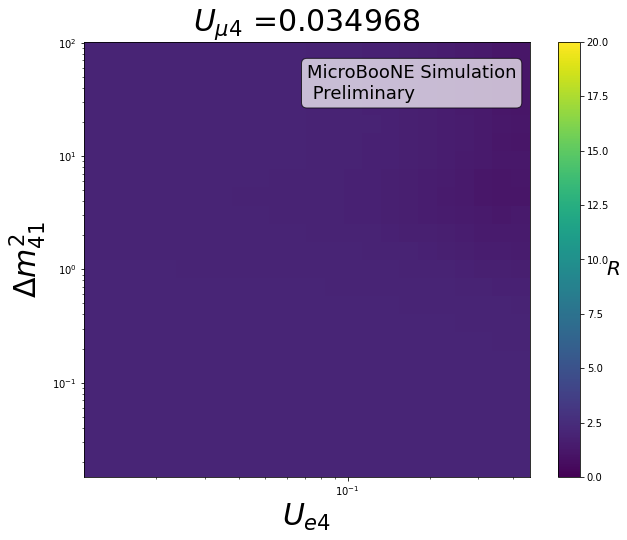

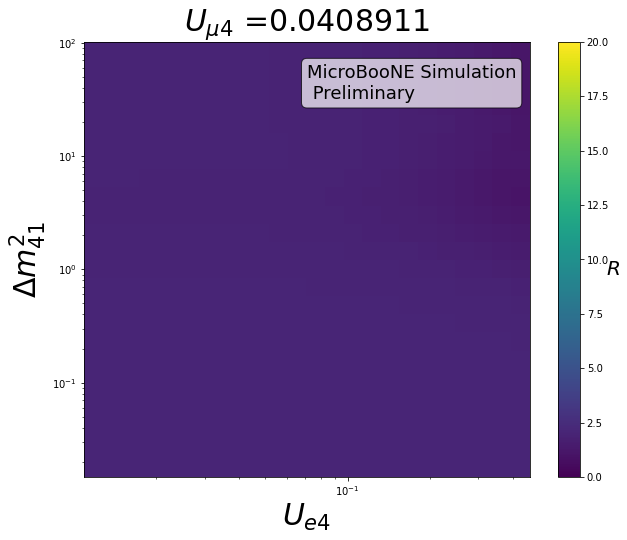

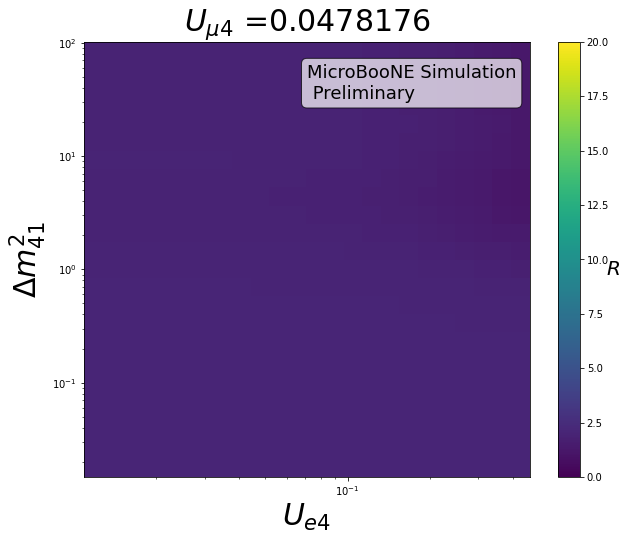

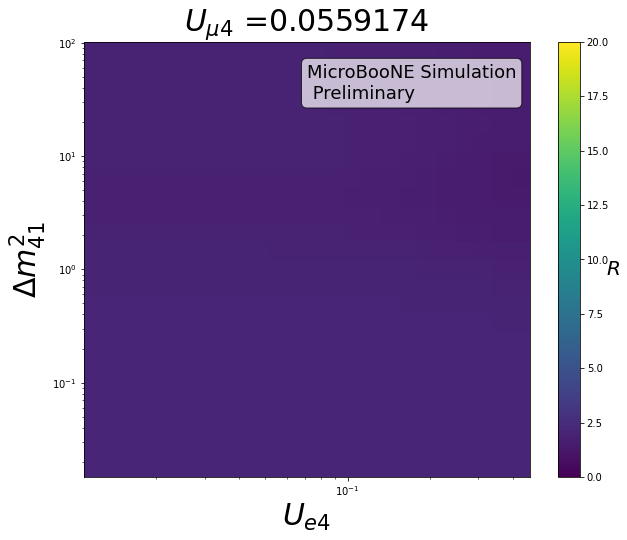

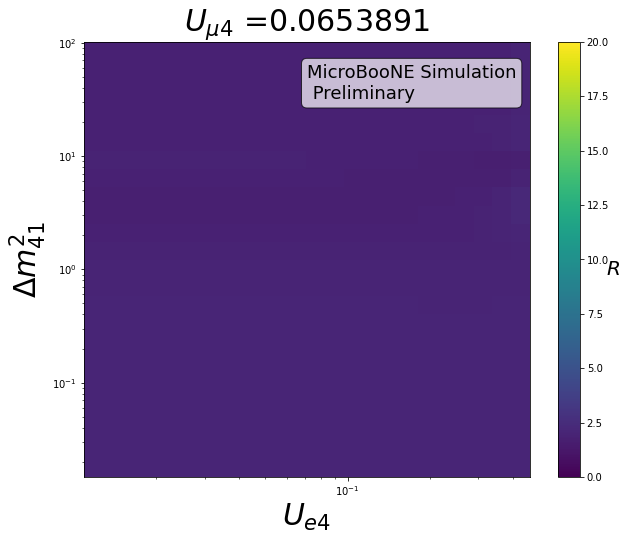

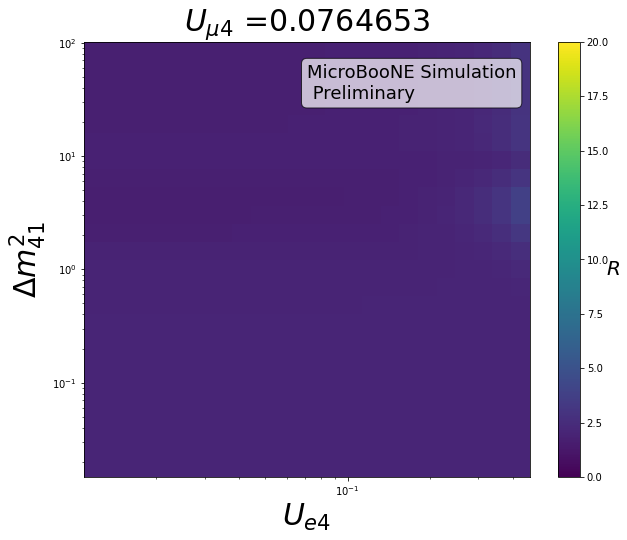

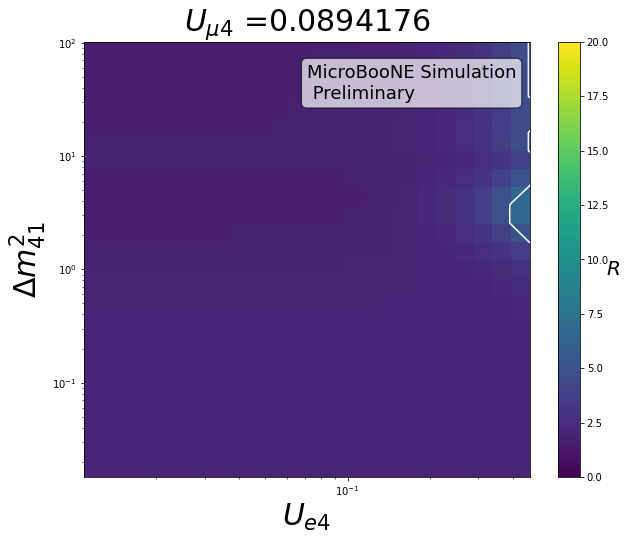

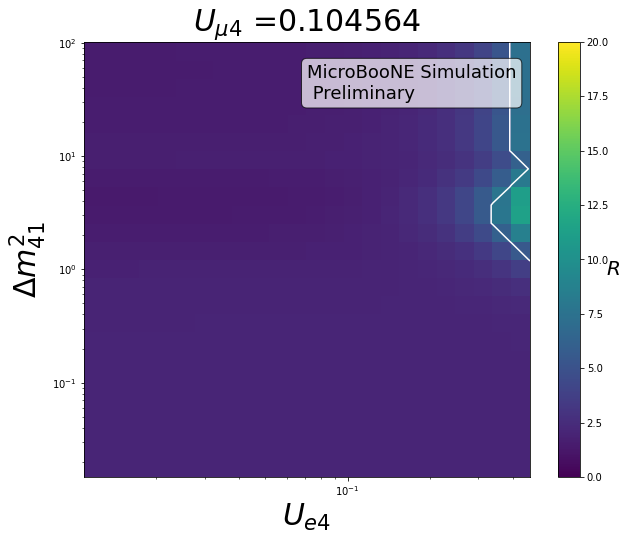

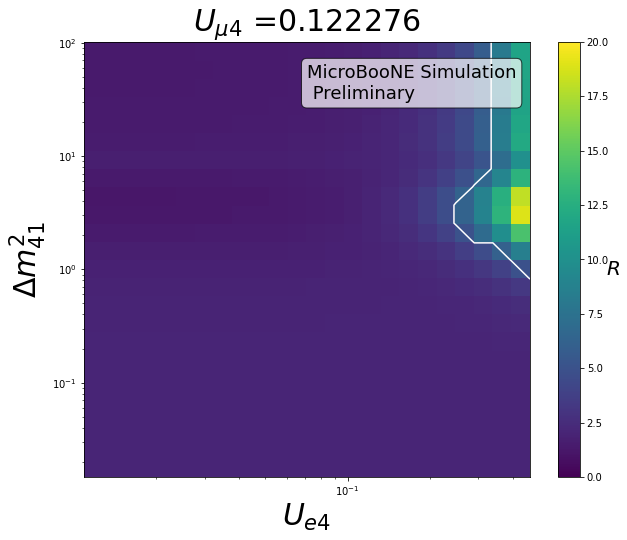

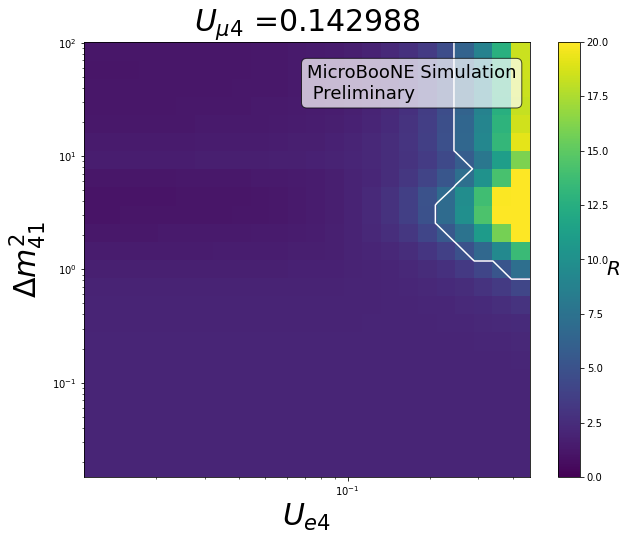

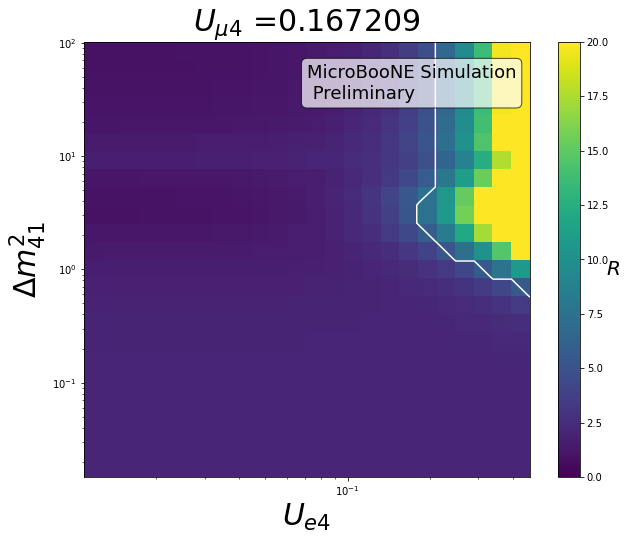

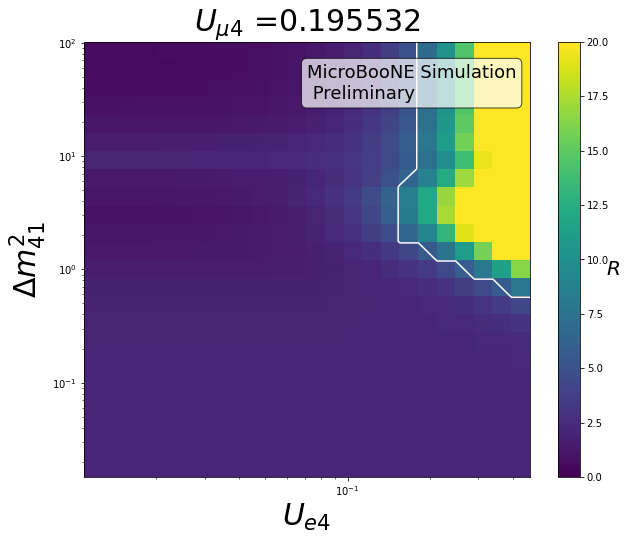

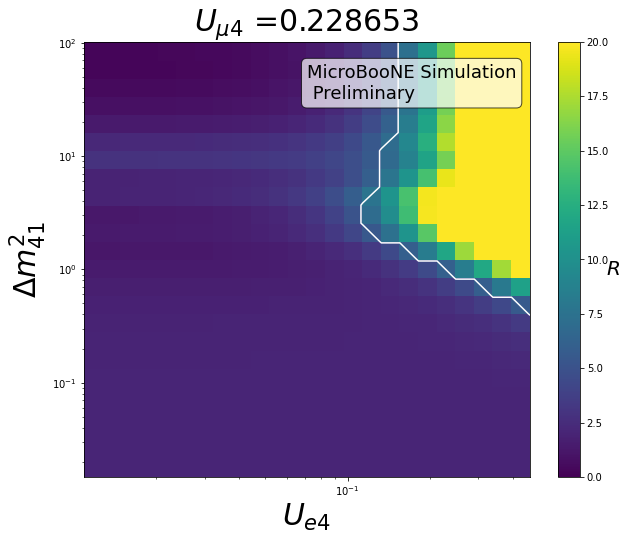

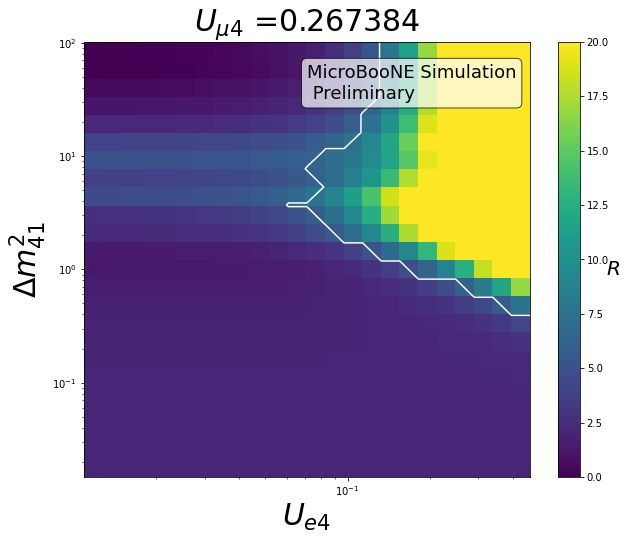

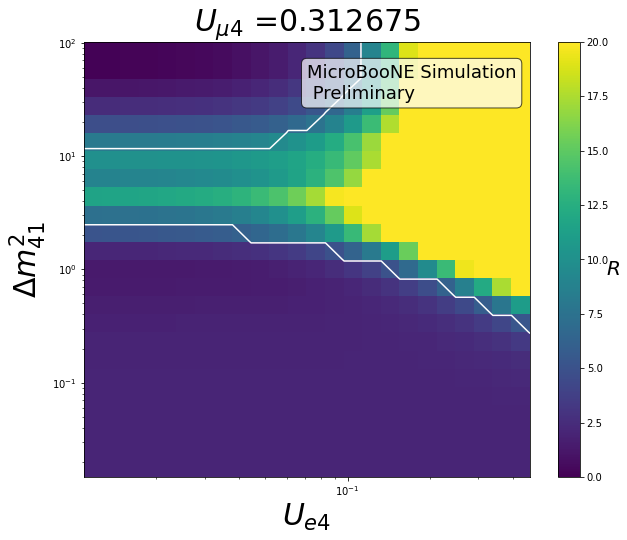

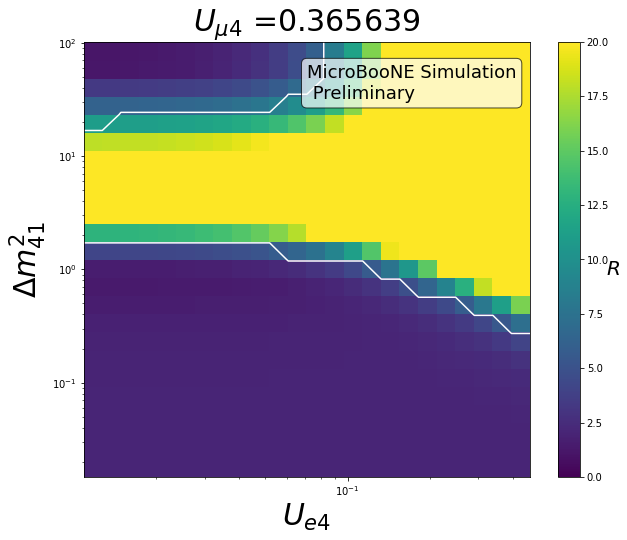

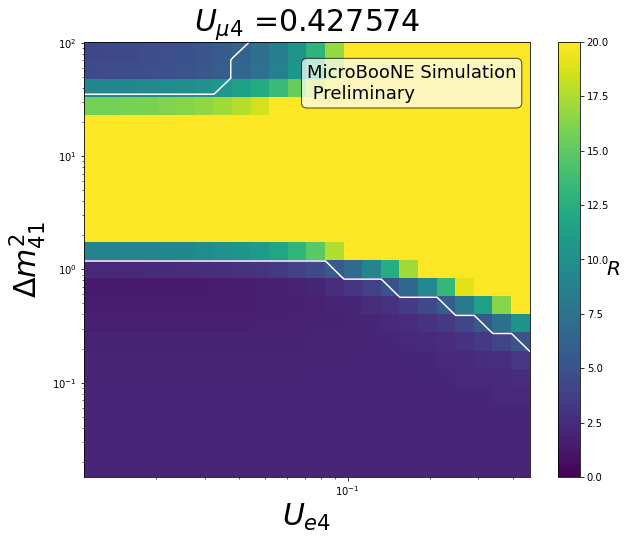

/usr/lib/python3/dist-packages/ipykernel_launcher.py:37: UserWarning: The following kwargs were not used by contour: 'fontsize'


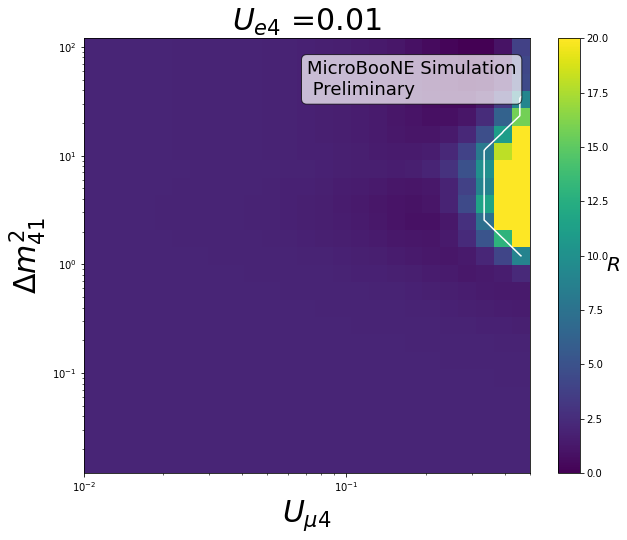

/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


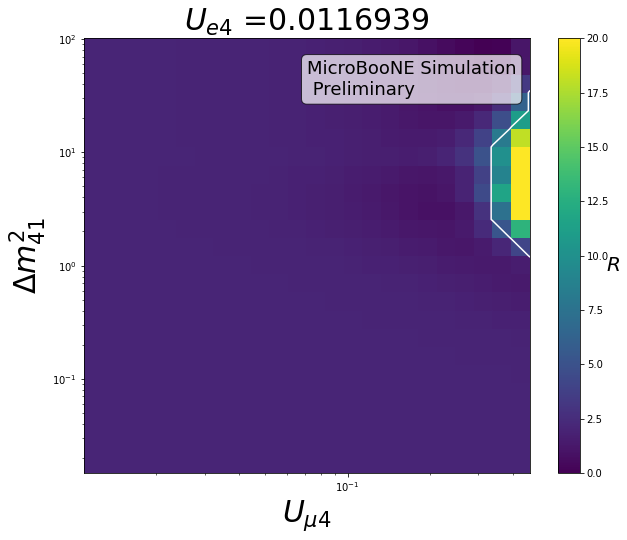

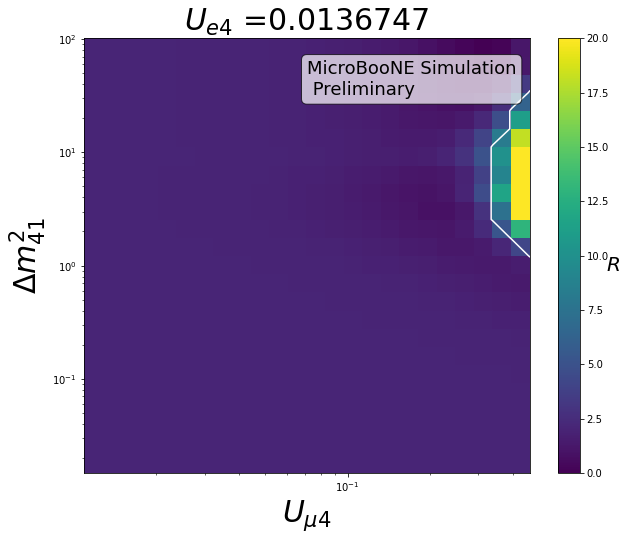

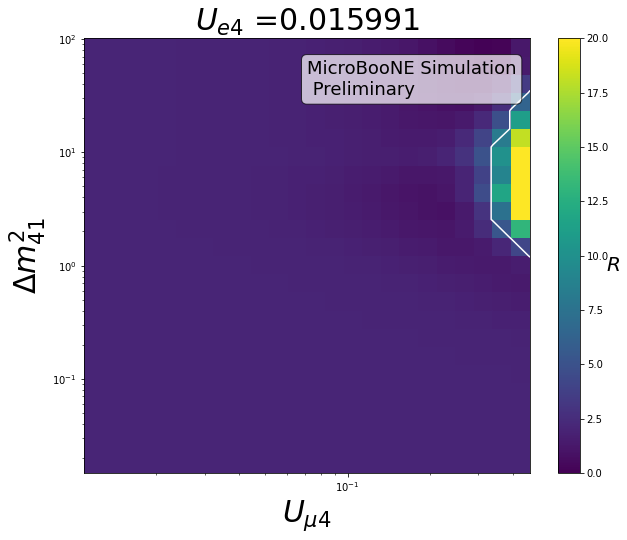

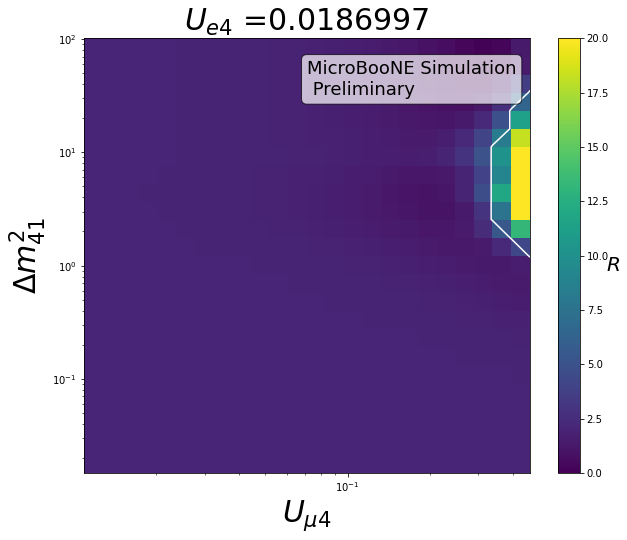

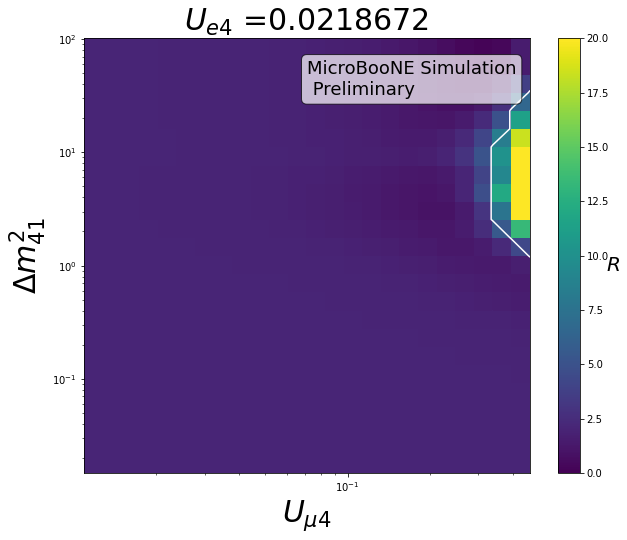

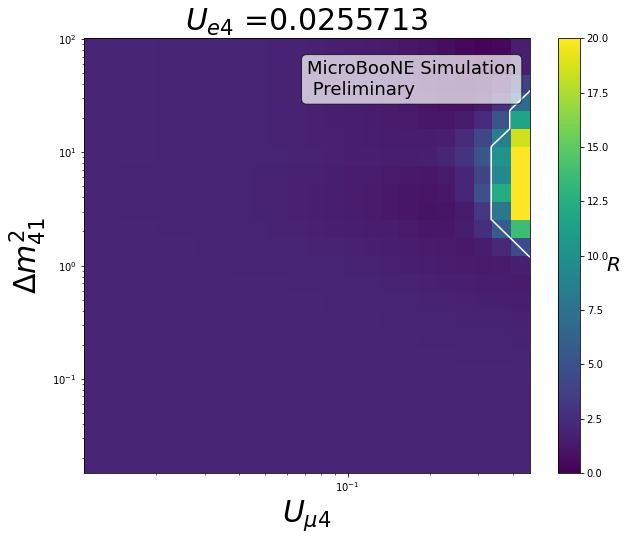

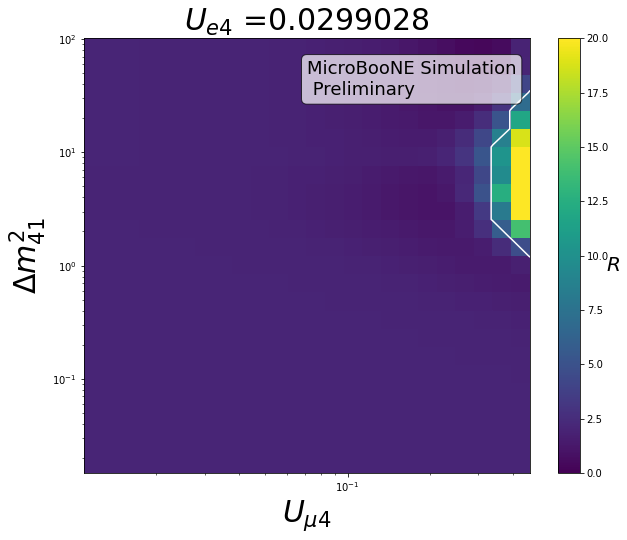

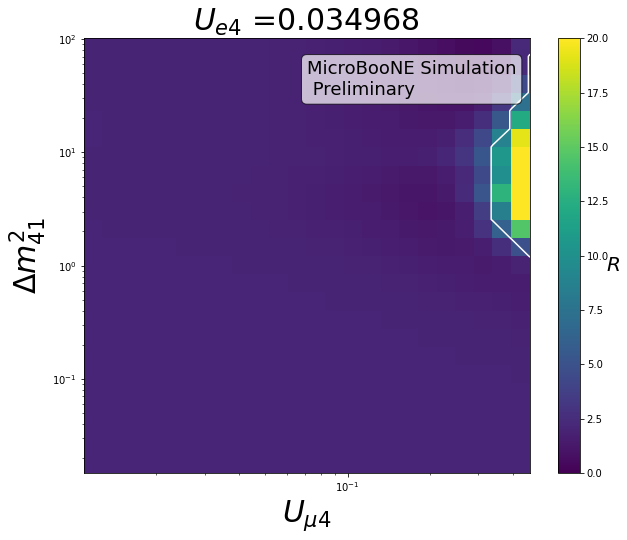

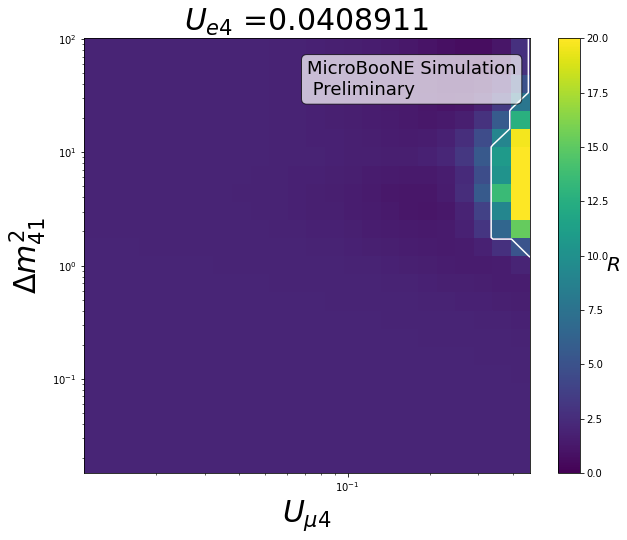

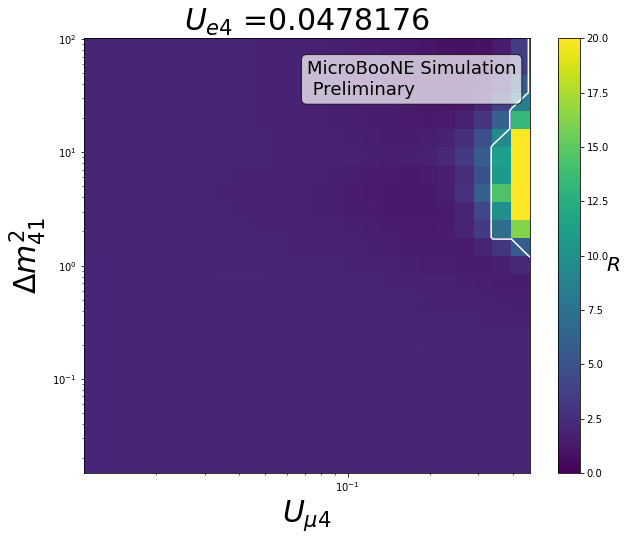

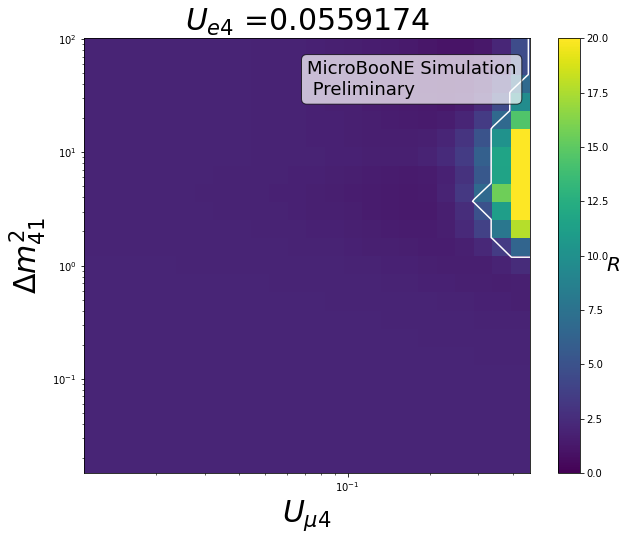

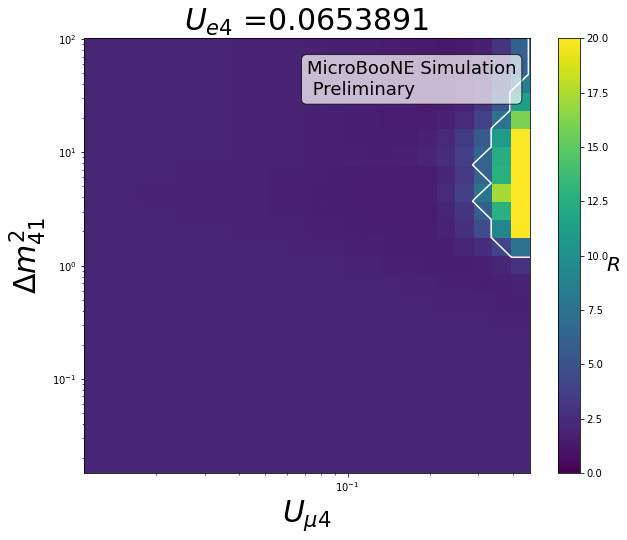

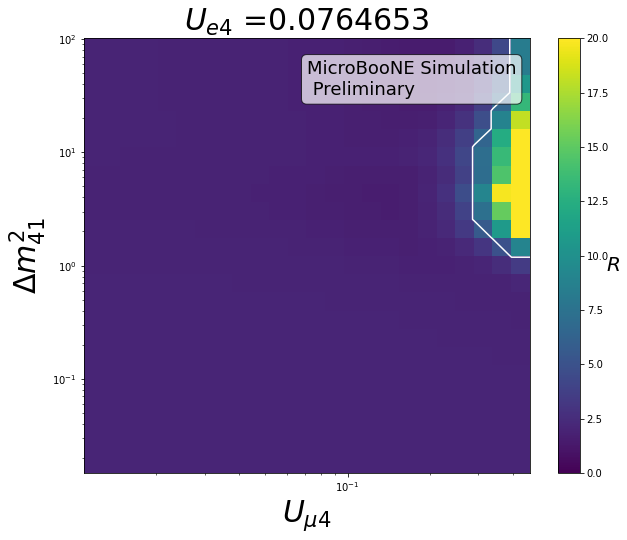

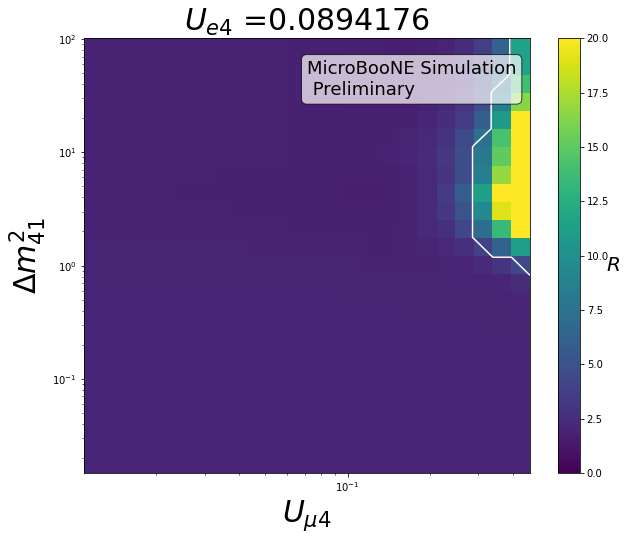

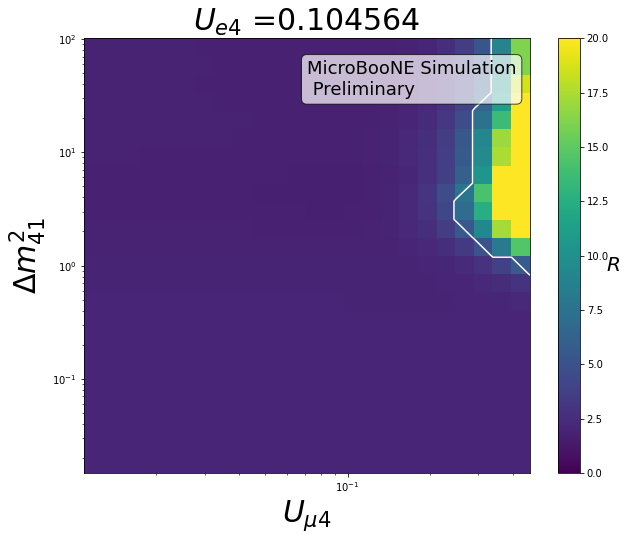

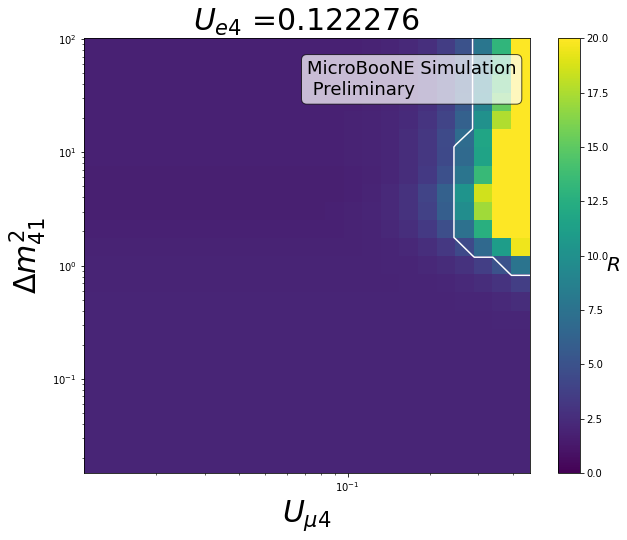

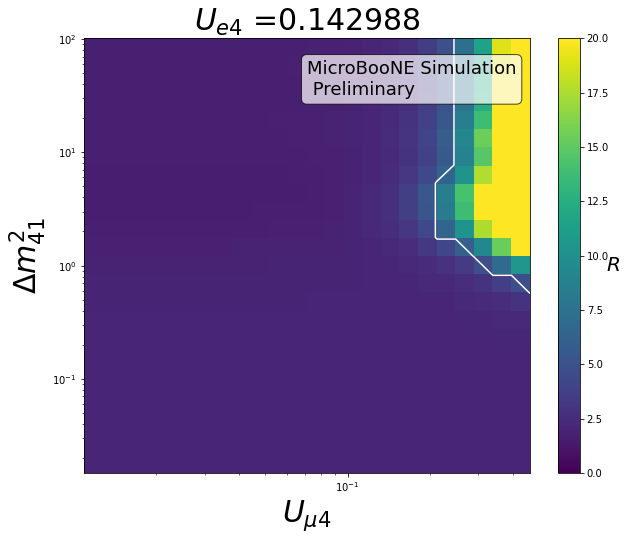

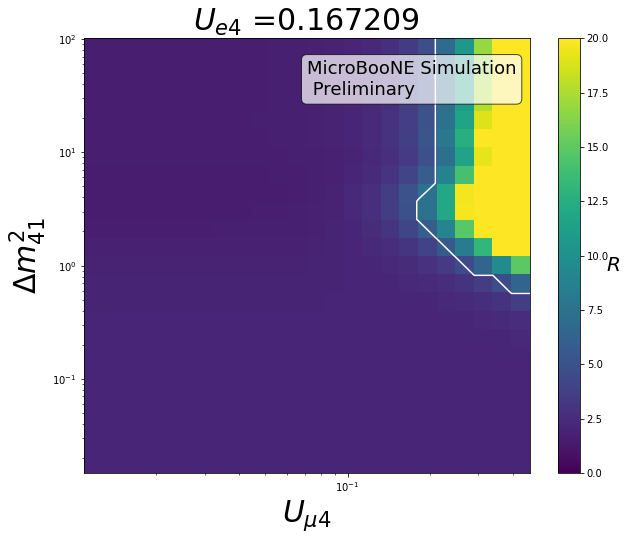

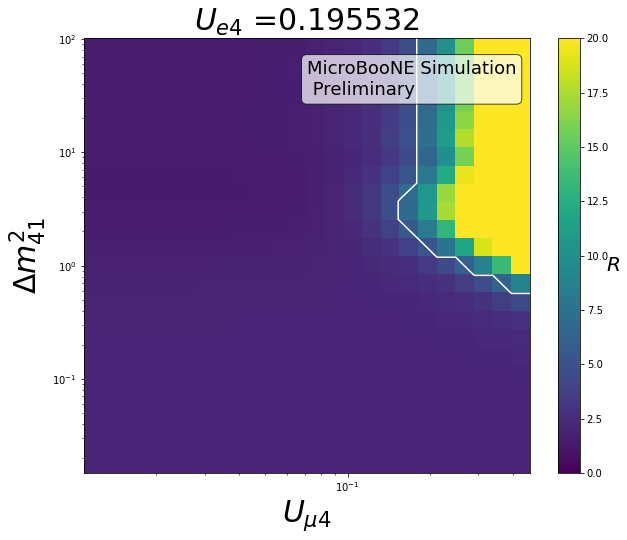

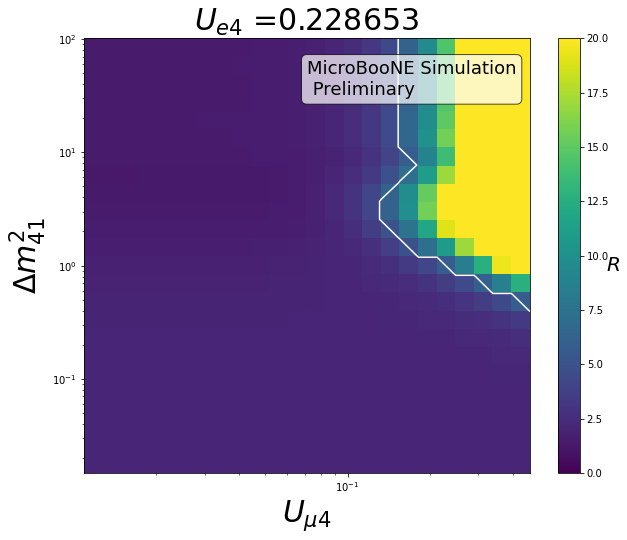

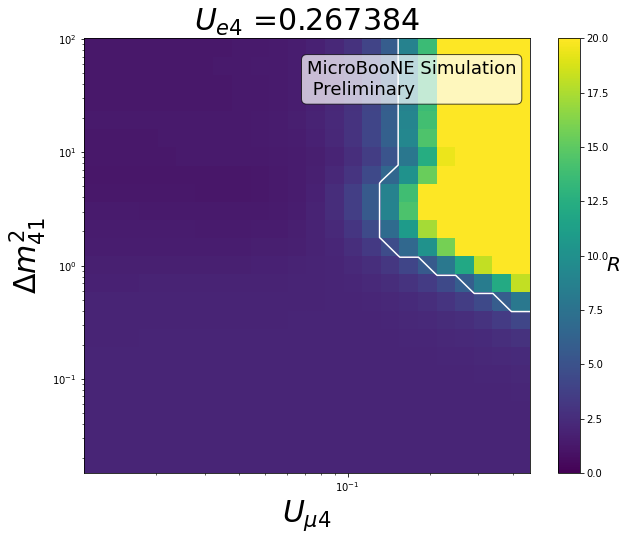

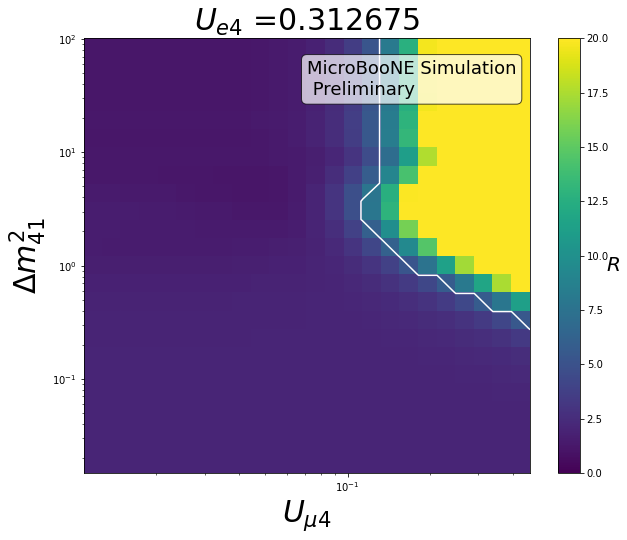

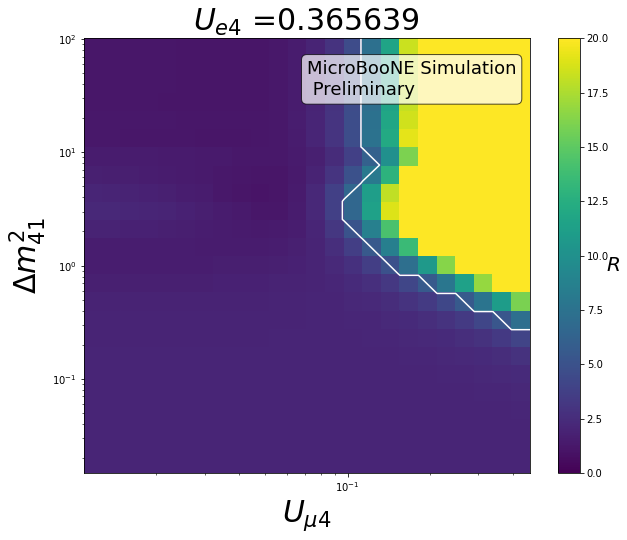

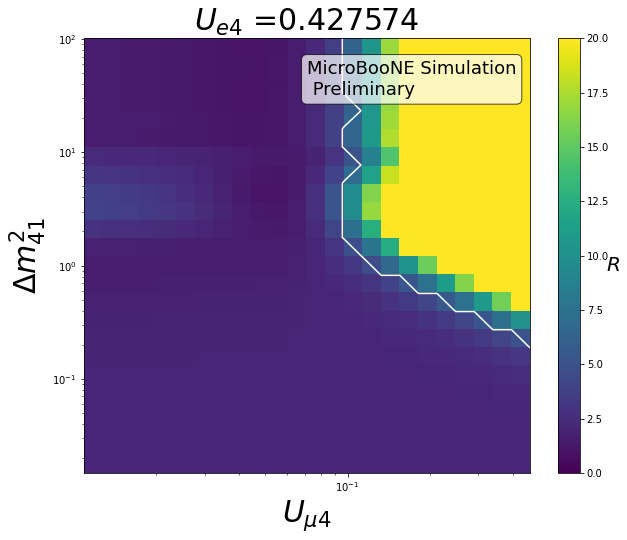

/usr/lib/python3/dist-packages/ipykernel_launcher.py:59: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:59: UserWarning: The following kwargs were not used by contour: 'fontsize'


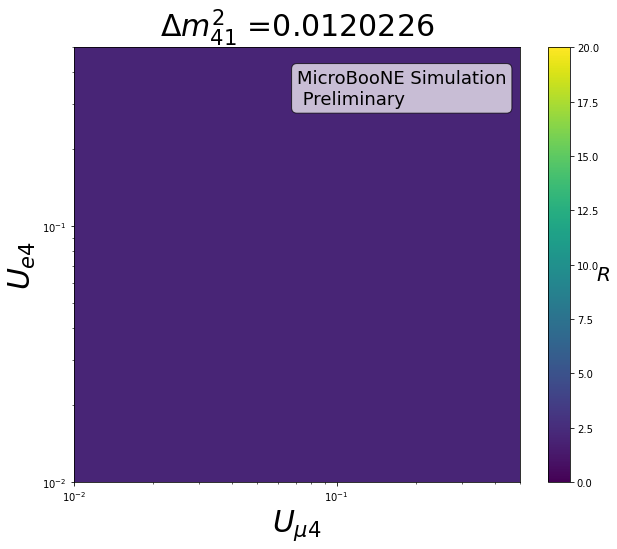

/usr/lib/python3/dist-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


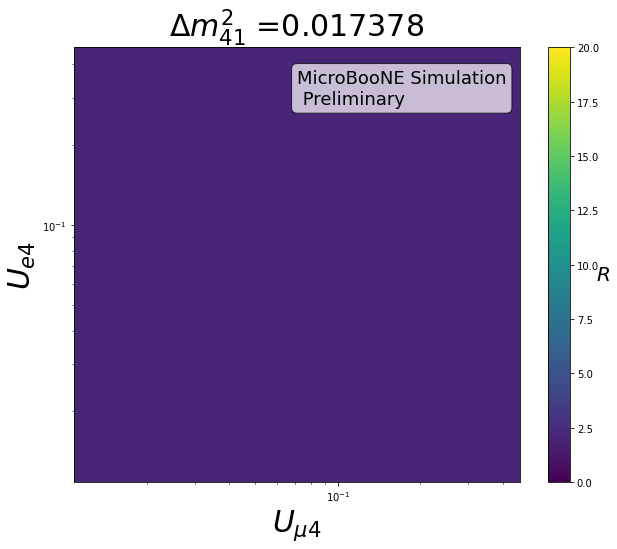

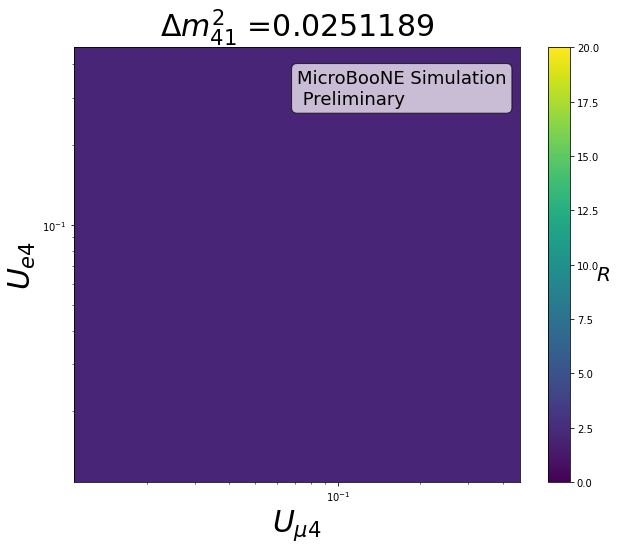

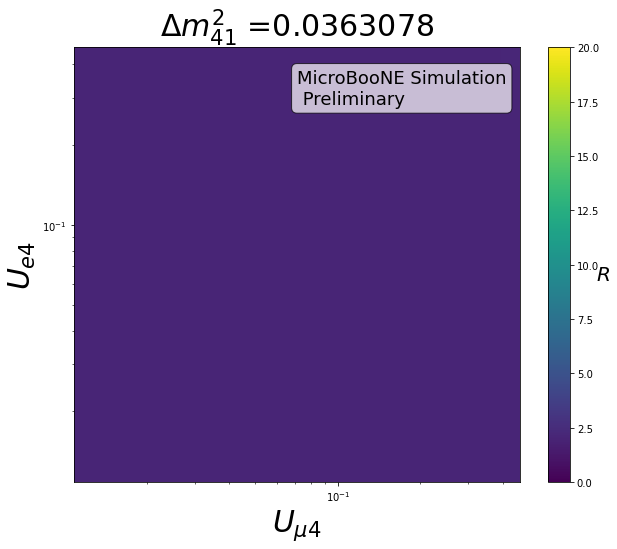

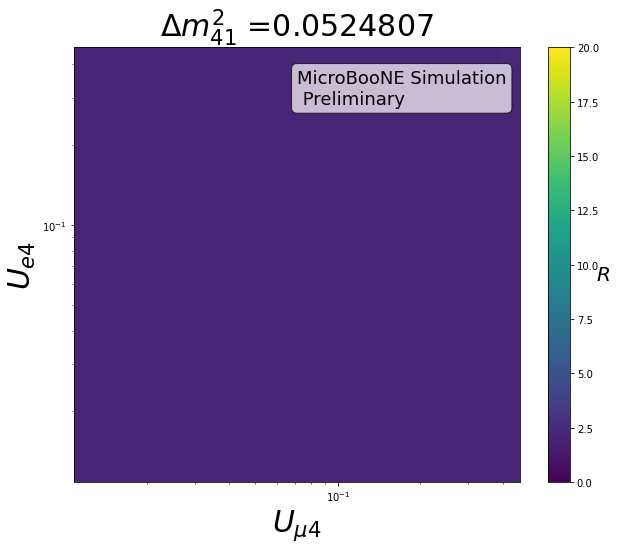

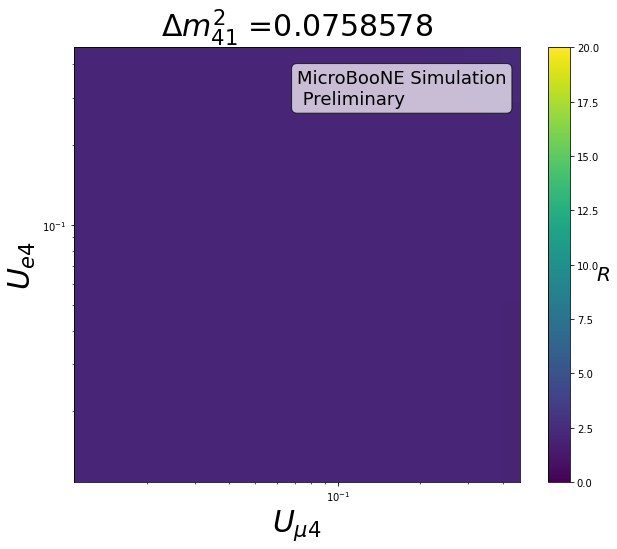

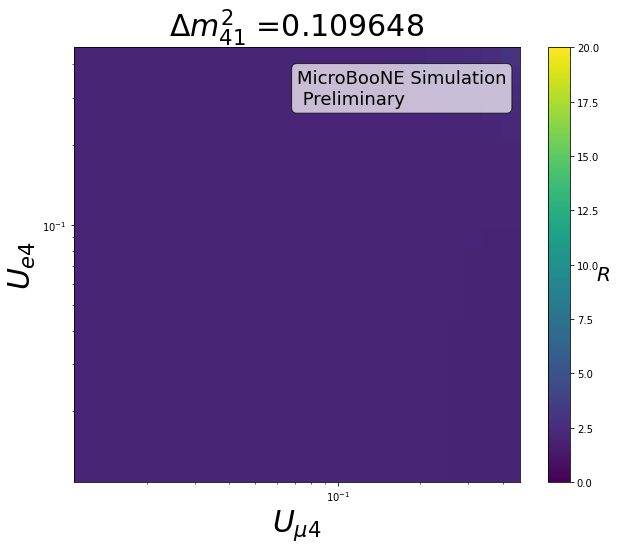

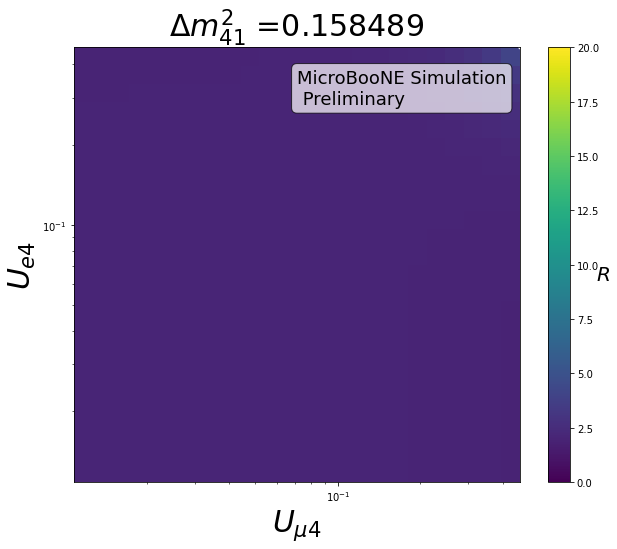

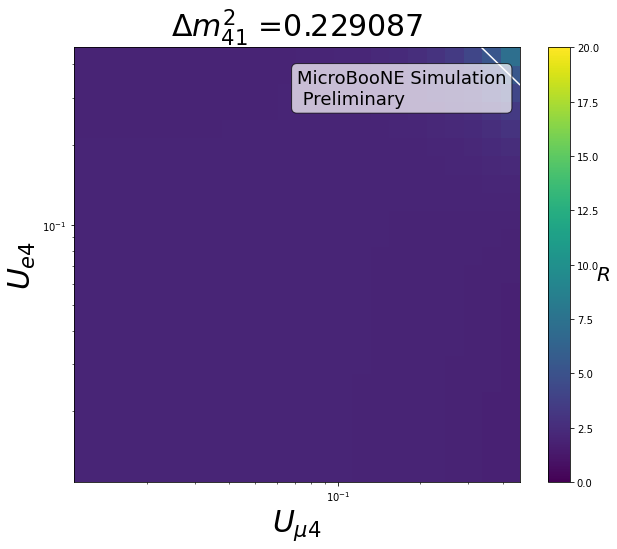

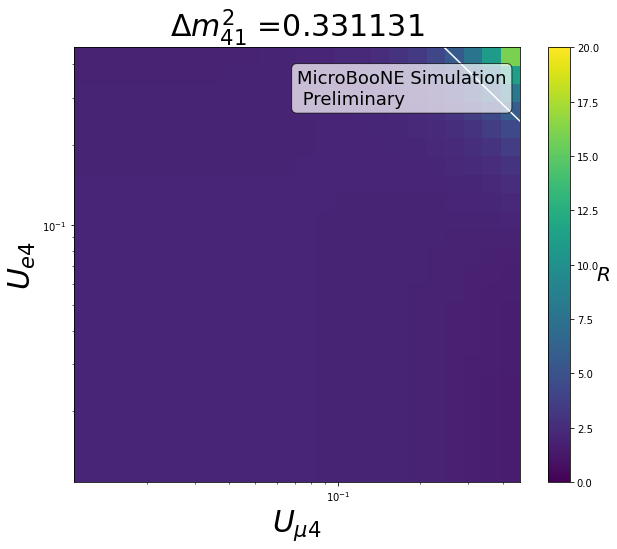

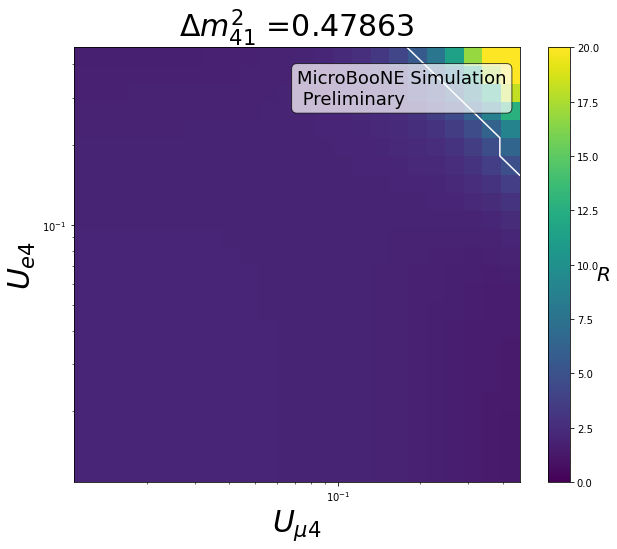

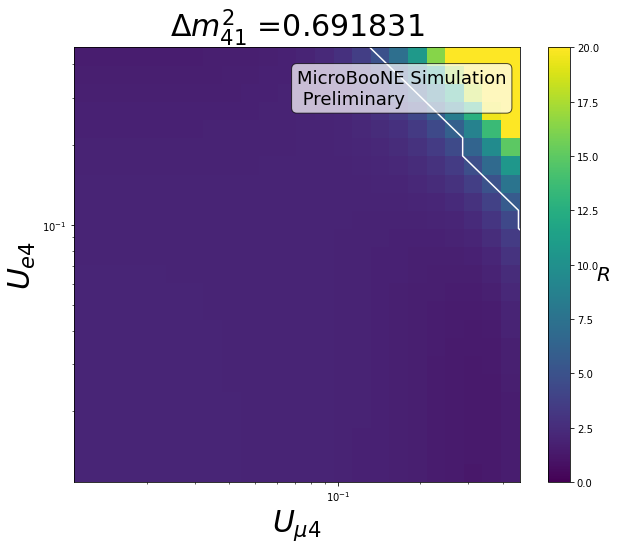

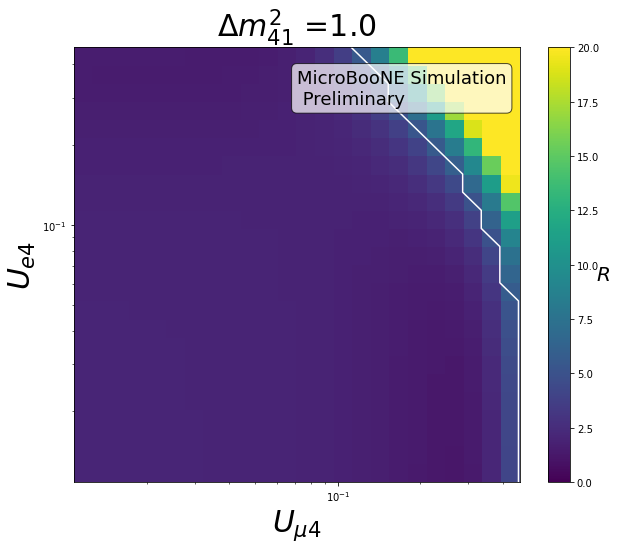

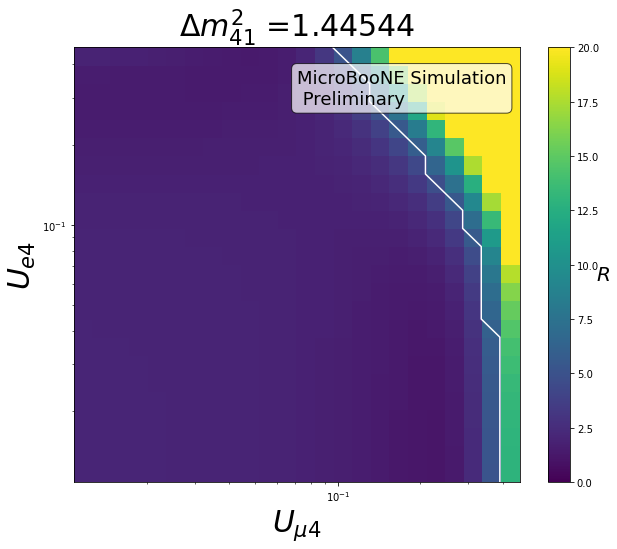

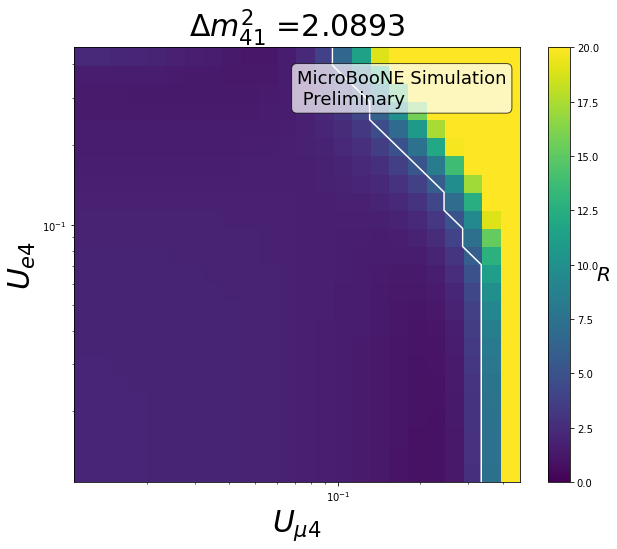

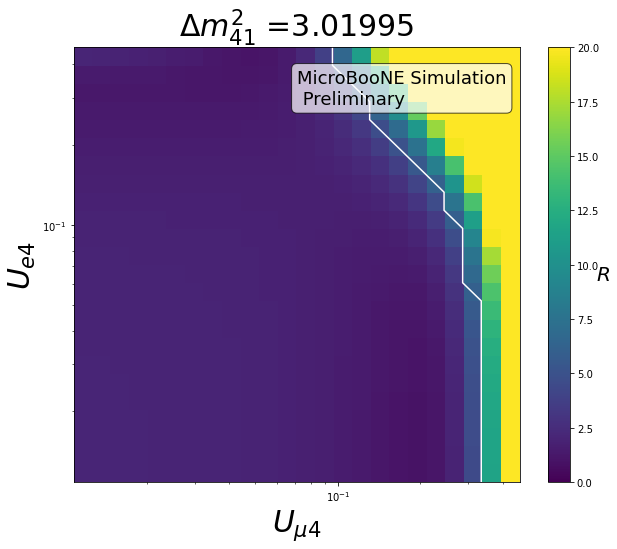

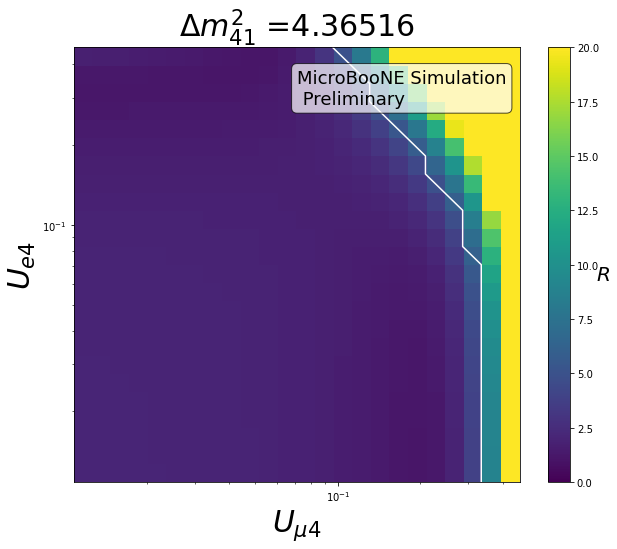

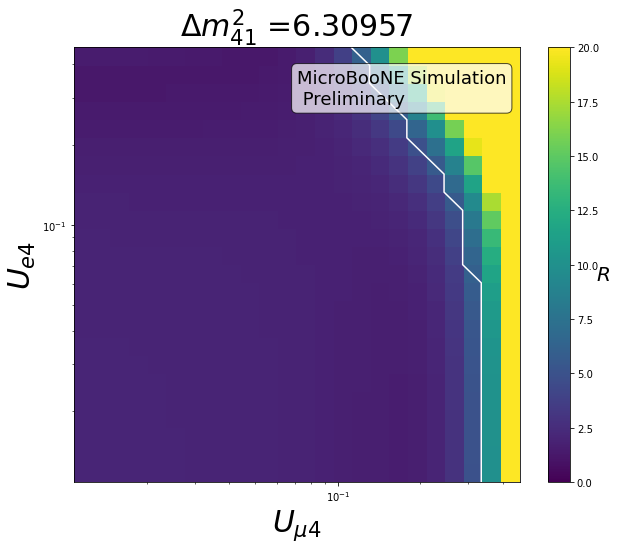

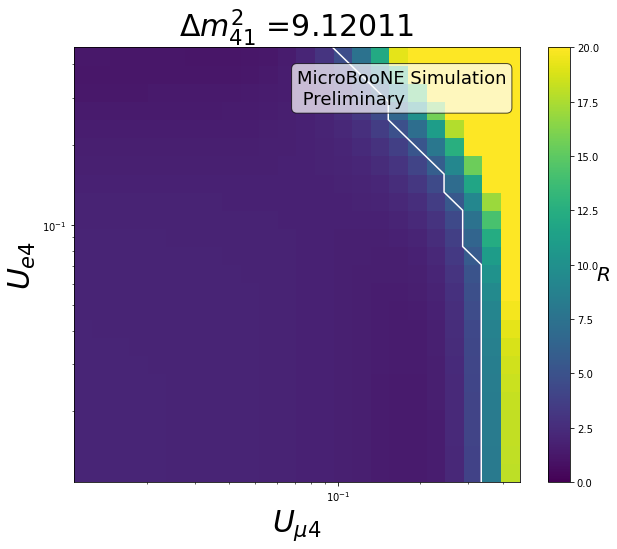

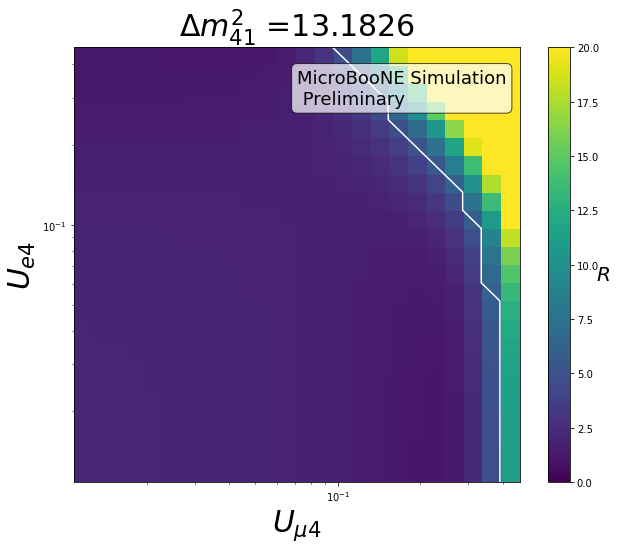

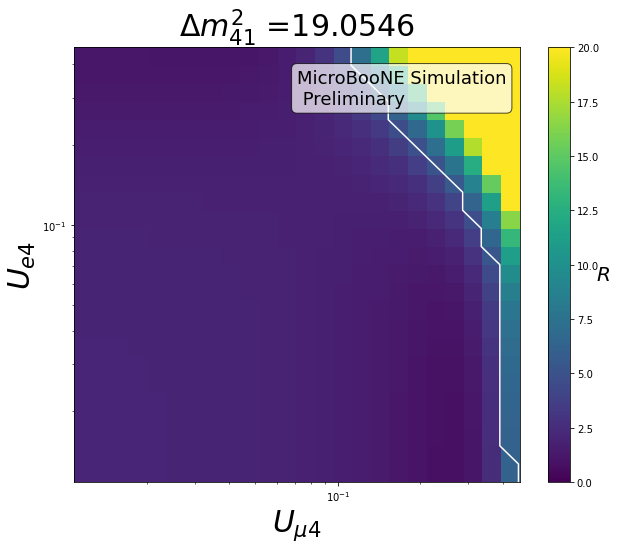

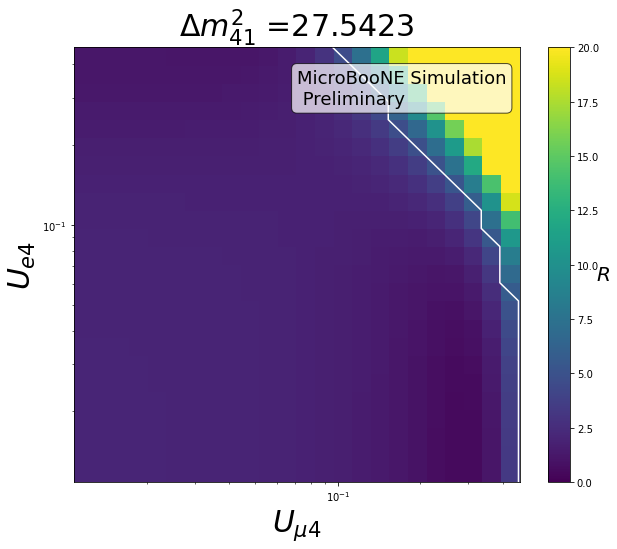

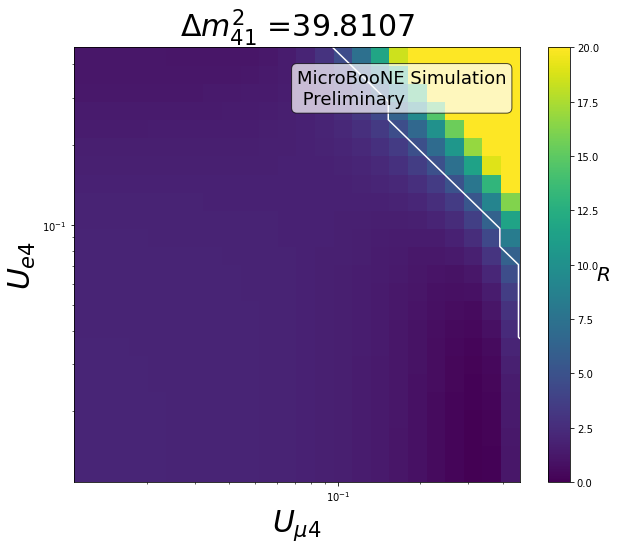

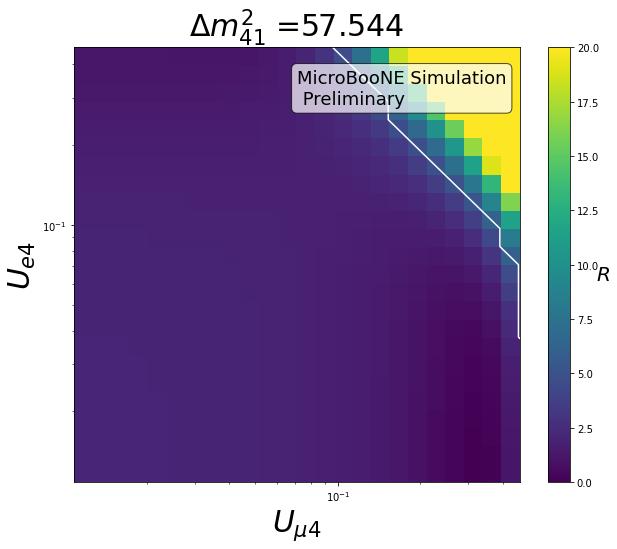

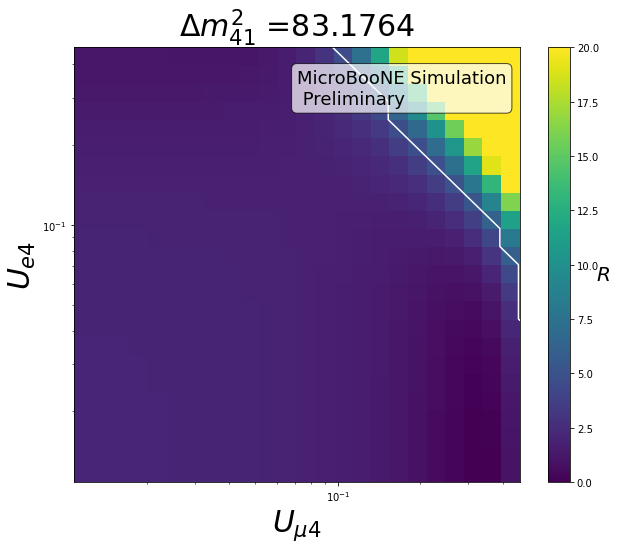

In [9]:
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

# norm=colors.Normalize(vmin=1e-13, vmax=20)

y,x = np.meshgrid(m41_list, ue4_list)
for i in range(len(um4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[:,:,i],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    y,x = np.meshgrid(m41_center, ue4_center)
    contours = plt.contour(x, y, confidence_arr[:,:,i],[.9], colors='white',fontsize=20,label="wilks 90% CL")
    plt.xlabel(r"$U_{e4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{\mu4}$ ="+str(um4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    props = dict(boxstyle='round', facecolor='white', alpha=0.7)
    ax.text(0.5, 0.95, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
            verticalalignment='top', bbox=props)
    pkl.dump(fig, open('sens_umu4_'+str(i)+'.p', 'wb'))
    plt.show()
    plt.close()
    
# at ue4
y,x = np.meshgrid(m41_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[i,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    y,x= np.meshgrid(m41_center, um4_center)
    contours = plt.contour(x, y, confidence_arr[i,:,:].transpose(),[.9], colors='white',fontsize=20)
    plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
    plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
    plt.title(r"$U_{e4}$ ="+str(ue4_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
    props = dict(boxstyle='round', facecolor='white', alpha=0.7)
    ax.text(0.5, 0.95, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
            verticalalignment='top', bbox=props)
    pkl.dump(fig, open('sens_ue4_'+str(i)+'.p', 'wb'))
    plt.show()
    plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
for i in range(len(ue4_center)):
    fig,ax = plt.subplots(figsize=(10,8))
    plt.pcolormesh(x, y, chi_arr_sens[:,i,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
    cbar = plt.colorbar()
    cbar.set_label(r'$R$',rotation=0,fontsize=20)
    #contour plots
    x,y = np.meshgrid(ue4_center, um4_center)
    contours = plt.contour(x, y, confidence_arr[:,i,:],[.9], colors='white',fontsize=20);
    plt.ylabel(r"$U_{e4}$",fontsize=30)
    plt.xlabel(r"$U_{\mu4}$",fontsize=30)
    plt.title(r"$\Delta m^2_{41}$ ="+str(m41_list[i]),fontsize=30)
    plt.xscale("log")
    plt.yscale("log")
                
    props = dict(boxstyle='round', facecolor='white', alpha=0.7)
    ax.text(0.5, 0.95, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
            verticalalignment='top', bbox=props)
    pkl.dump(fig, open('sens_m41_'+str(i)+'.p', 'wb'))
    plt.show()
    plt.close()